# 25강. 선형 회귀와 로지스틱 회귀

## 25-2. 선형 회귀 분석(Linear Regression)

In [1]:
# Boston house prices dataset 데이터 준비하기
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PRATIO','B','LSTAT'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT
0,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12
1,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
2,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
3,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73
4,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38


- [pd.read_csv()](https://rfriend.tistory.com/250)  
sep="\s+" : 구분자, header=None : 칼럼 이름이 없음, skiprows=22 : 22번째 줄까지 제외
- [np.hstack](https://ponyozzang.tistory.com/507) : 배열을 옆으로 결합
- [[1::2, :2]](https://blog.wonkyunglee.io/3) : 1행부터 끝행까지 2간격으로 & 시작열부터 2열까지 슬라이싱

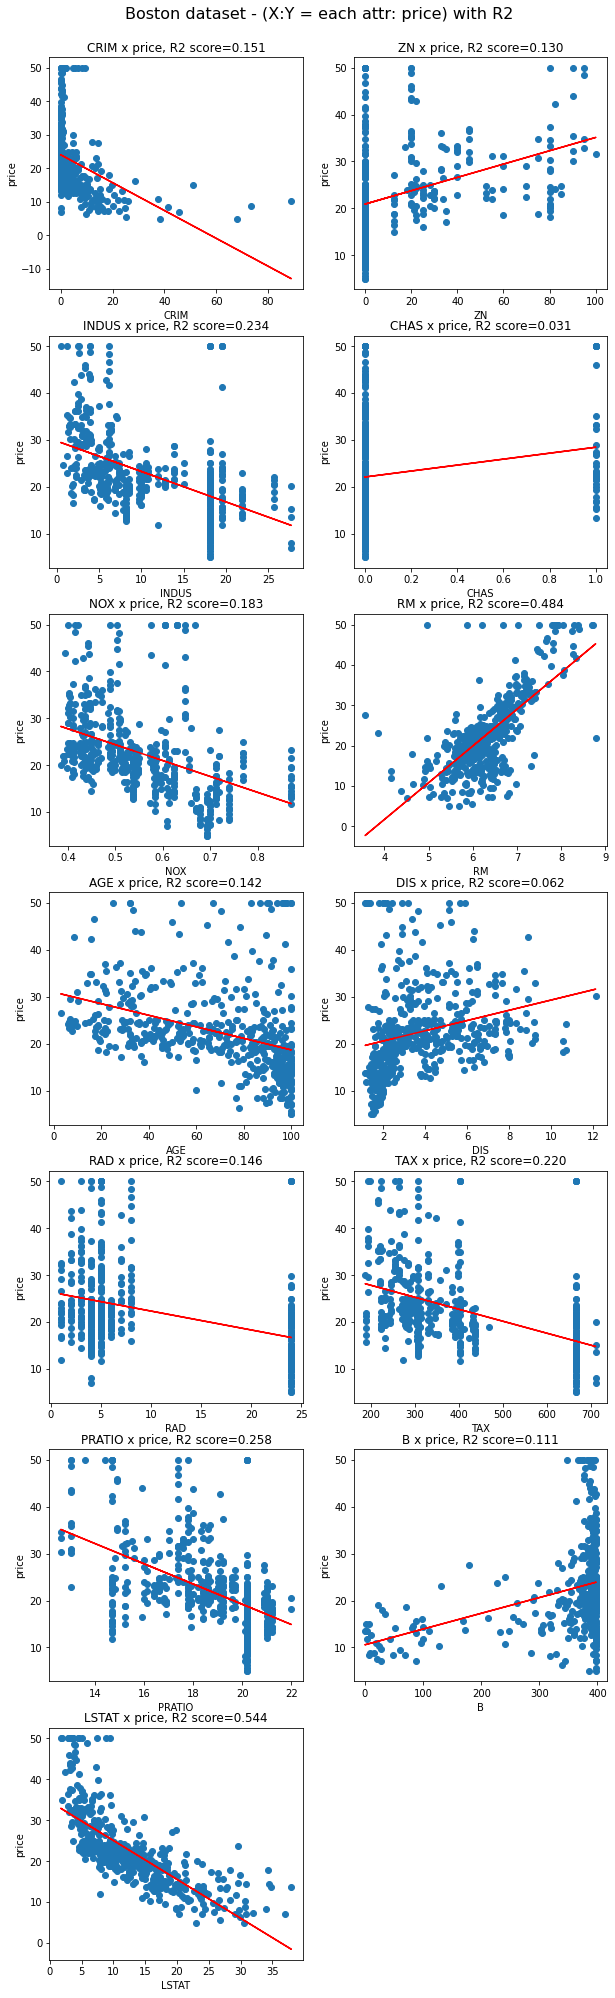

In [11]:
# Boston Dataset에 Linear Regression 적용하기
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴보기
    single_attr, attr_name = data[:, i].reshape(-1, 1), df.columns[i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression()
    
     # x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하기
    estimator.fit(single_attr, price)
    
    # 위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값 
    pred_price = estimator.predict(single_attr)
    
    # 결정계수를 구하는 함수
    score = metrics.r2_score(price, pred_price)
    
    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

## 25-3. 로지스틱 회귀분석(Logistic Regression)

In [5]:
# 유방암 데이터셋(이진분류)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 25-4. Softmax 함수와 Cross Entropy


In [12]:
# 유방암 데이터셋 -> softmax, cross entropy
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

# 로지스틱 회귀 구현(Dense 레이어 하나만 사용)
model=keras.models.Sequential()
model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax', input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 97.7346 - accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 941us/step - loss: 64.3746 - accuracy: 0.6270
Epoch 3/20
16/16 [==============================] - 0s 997us/step - loss: 32.8386 - accuracy: 0.6406
Epoch 4/20
16/16 [==============================] - 0s 903us/step - loss: 8.1572 - accuracy: 0.7461
Epoch 5/20
16/16 [==============================] - 0s 1ms/step - loss: 2.1337 - accuracy: 0.7637
Epoch 6/20
16/16 [==============================] - 0s 958us/step - loss: 1.9460 - accuracy: 0.7656
Epoch 7/20
16/16 [==============================] - 0s 

In [13]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 33.8797 - accuracy: 0.5742
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 3.4021 - accuracy: 0.8047
Epoch 3/20
16/16 [==============================] - 0

- 유방암 데이터셋은 512개밖에 되지 않은 작은 데이터셋이므로 레이어를 깊게 쌓는다고 해서 성능 향상에 크게 유리한 점은 없다. 로지스틱 회귀만으로도 충분한 성능을 낼 수 있었다. 하지만 데이터셋 크기가 커지면 레이어를 깊게 쌓아 성능을 향상시킬 수 있다.

![비교표](https://user-images.githubusercontent.com/116326867/206373491-cd8d4e06-4350-405c-8635-e5e63bfde4eb.png)